This problem was asked by Google.

The area of a circle is defined as πr^2. Estimate π to 3 decimal places using a Monte Carlo method.

Hint: The basic equation of a circle is x2 + y2 = r2.

Percentage: 3.1414248 Estimated Area: 7853561999.999999 Actual Area: 7853981633.974483


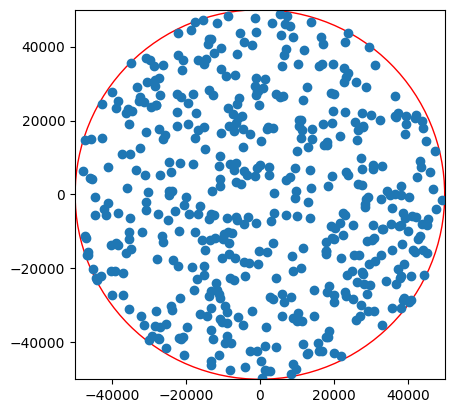

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math



S = 100000
R = S/2
iters = 10000000
points = []


for i in range(iters):
    points.append(np.random.randint(low=-R, high=R + 1, size=2))


points = np.array(points)



fig, ax = plt.subplots()

circle = patches.Circle((0, 0), R , edgecolor='r', facecolor='none')
ax.add_patch(circle)

ax.set_xlim(-R  - 5, R  + 5)
ax.set_ylim(-R  - 5, R  + 5)

ax.set_aspect('equal')


R_squared = R**2

# estimate area
points_inside = []
points_outside = []

for i in range(iters):
    arr = points[i]
    if arr[0]**2 + arr[1]**2 <= R_squared:
        points_inside.append(arr)
    else:
        points_outside.append(arr)


points_inside = np.array(points_inside)
points_outside = np.array(points_outside)

ax.scatter(x = points_inside[:500:,0],y = points_inside[:500:,1])


percentage = (points_inside.shape[0]/iters)
estimated_area = (points_inside.shape[0]/iters) * (S*S)
actual_area = math.pi * R_squared

print("Percentage:", percentage * 4, "Estimated Area:", estimated_area, "Actual Area:", actual_area)

plt.show()




## Can we do better?

Turns out we can. By only using integer operations (avoiding floating point to make things faster) we can observe that the estimated area of any circle is simply the # of integer lattice points fully contained within the circle. This makes sense because essentially this is what we are counting in the code above, except we just take a percentage since we are using a monte carlo. 

The next steps would be to find a closed form that gives us the number of integer points inside a unit circle as a function of the radius, then find bounds on the error produced estimating a circles area this way.